In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,ID,FS1,FS2,FS3,FS4,FS5,FS6,FS7,FS8,FS9,...,FS22,FS23,FS24,FS25,FS26,FS27,FS28,FS29,FS30,Result
0,ID_1,26.719767,0.038866,3.259868,7.592310,1731.0,1635.5,1654.496281,19.838291,0.00,...,5,1687.285,1,51.361257,42.936450,25.60,337.491829,1720.073719,0.482759,1681.35
1,ID_3,31.282892,0.045926,6.181881,16.542359,1731.0,1638.1,1645.334948,15.594063,8.15,...,3,1684.005,1,50.000000,37.370007,25.60,330.551640,1722.675052,0.551724,1685.25
2,ID_4,32.920729,0.051533,9.373390,24.774665,1731.0,1638.1,1637.389563,14.230595,0.00,...,2,1680.695,1,41.603875,37.834580,23.60,338.835156,1724.000437,0.586207,1699.75
3,ID_5,33.825847,0.054404,9.916515,24.480119,1731.0,1638.1,1633.016860,15.295964,23.20,...,6,1678.680,1,33.638321,40.508444,33.10,350.261284,1724.343140,0.689655,1701.65
4,ID_7,33.314419,0.053439,20.821194,53.587983,1731.0,1638.1,1632.176674,9.016514,0.00,...,4,1676.985,1,61.248654,38.854222,42.15,365.390474,1721.793326,0.758621,1666.20


In [ ]:
test_data.head()

,ID,FS1,FS2,FS3,FS4,FS5,FS6,FS7,FS8,FS9,...,FS21,FS22,FS23,FS24,FS25,FS26,FS27,FS28,FS29,FS30
0,ID_2,28.845040,0.046687,2.772824,6.904373,1731.00,1635.50,1644.445446,21.466612,28.0,...,95.50,4,1683.750,1,23.926702,40.160401,49.05,346.546476,1723.054554,0.517241
1,ID_6,34.864261,0.054429,18.266326,48.812841,1731.00,1638.10,1632.971186,9.577412,4.1,...,92.90,5,1678.655,1,58.127018,37.421149,23.55,352.401427,1724.338814,0.724138
2,ID_15,28.899773,0.031504,11.671752,26.867619,1680.55,1620.25,1625.987940,15.884977,0.0,...,60.30,5,1652.010,1,81.011609,43.441707,22.55,321.407495,1678.032060,0.193548
3,ID_18,30.012791,0.139381,21.039887,42.194357,1669.25,1486.60,1503.408011,14.412166,0.0,...,182.65,2,1616.030,1,94.360799,49.864219,10.10,322.115905,1728.651989,0.290323
4,ID_19,28.659284,0.149105,21.720951,42.194357,1669.25,1486.60,1483.552097,14.878690,0.0,...,182.65,7,1603.065,1,88.831098,51.478331,24.25,346.684339,1722.577903,0.354839


In [ ]:
from scipy import stats
import pandas as pd

for i in range(1, 31):
    column_name = 'FS' + str(i)
    pearson_coef, p_value = stats.pearsonr(train_data[column_name], train_data['Result'])
    print(f"For {column_name}: Pearson Coefficient = {pearson_coef}, p-value = {p_value}")

For FS1: Pearson Coefficient = 0.03738848672981308, p-value = 0.16250777062668162
For FS2: Pearson Coefficient = 0.03190734581646596, p-value = 0.23333196803682466
For FS3: Pearson Coefficient = 0.10080649129952798, p-value = 0.0001606285757099303
For FS4: Pearson Coefficient = 0.03587181133312966, p-value = 0.180247776404805
For FS5: Pearson Coefficient = 0.9938832083601253, p-value = 0.0
For FS6: Pearson Coefficient = 0.9949191421149278, p-value = 0.0
For FS7: Pearson Coefficient = 0.9945552929223688, p-value = 0.0
For FS8: Pearson Coefficient = 0.0846459954017265, p-value = 0.0015422153718145548
For FS9: Pearson Coefficient = 0.17639724740765128, p-value = 3.151109216543231e-11
For FS10: Pearson Coefficient = 0.545660880524491, p-value = 3.324524042974136e-109
For FS11: Pearson Coefficient = 0.9954842201570132, p-value = 0.0
For FS12: Pearson Coefficient = 0.9945231498909186, p-value = 0.0
For FS13: Pearson Coefficient = 0.9922520781292917, p-value = 0.0
For FS14: Pearson Coefficien

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
selected_features = []

significance_level = 0.0

for i in range(1, 31):
    column_name = 'FS' + str(i)
    pearson_coef = stats.pearsonr(train_data[column_name], train_data['Result'])[0]
    p_value = stats.pearsonr(train_data[column_name], train_data['Result'])[1]

    if  p_value == significance_level:
        selected_features.append(column_name)

print("Selected Features based on Pearson correlation and p-value:")
print(selected_features)

Selected Features based on Pearson correlation and p-value:
['FS5', 'FS6', 'FS7', 'FS11', 'FS12', 'FS13', 'FS14', 'FS15', 'FS23', 'FS28', 'FS29']


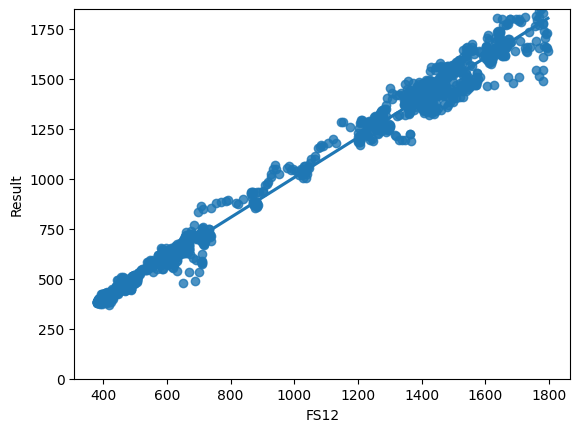

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='FS12', y='Result', data=train_data)
plt.ylim(0, max(train_data['Result']))
plt.show()


In [ ]:
features = train_data[selected_features]
target = train_data['Result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate' : [0.05, 0.10, 0.20],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 5],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.5, 1, 5],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
model = XGBRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

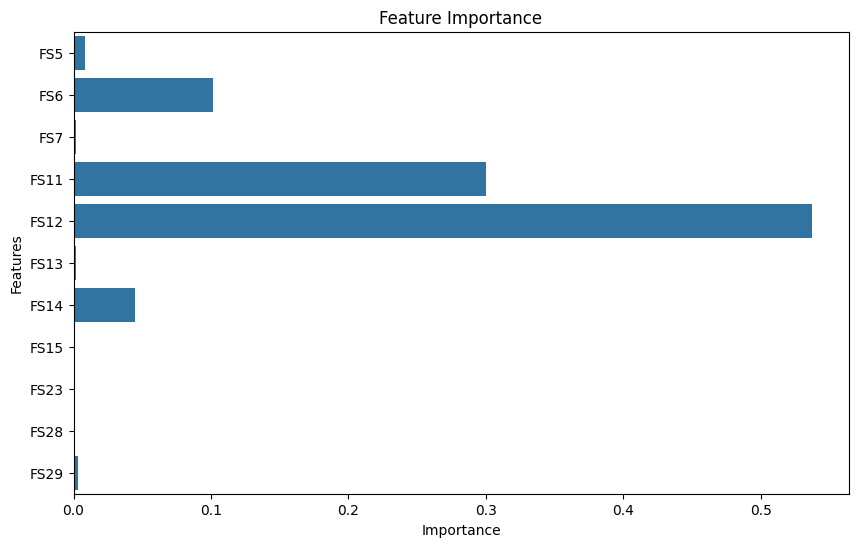

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=selected_features, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 25.804745825628785


In [ ]:
test_features = test_data[selected_features]
test_predictions = model.predict(test_features)

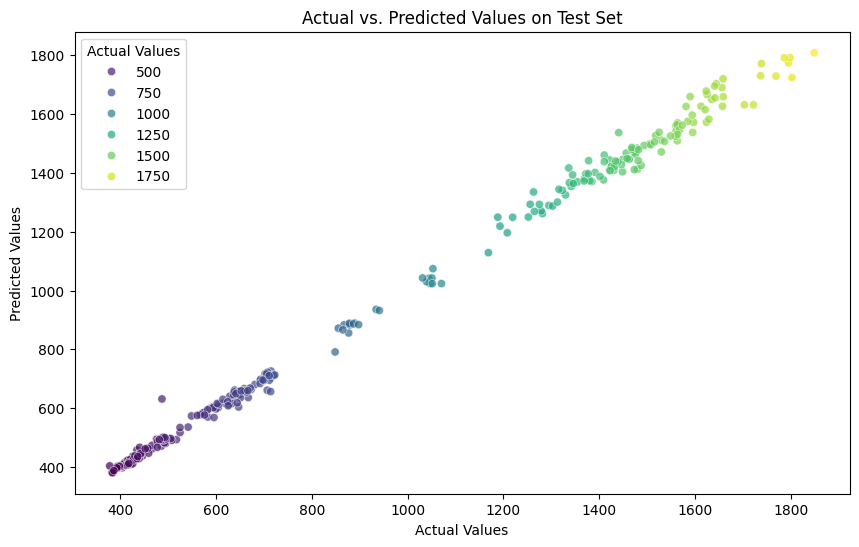

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis', alpha=0.7)
plt.title('Actual vs. Predicted Values on Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Actual Values', loc='upper left')
plt.show()

In [ ]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Result': test_predictions})
submission_df.to_csv('submission.csv', index=False)


In [ ]:
RESULTS_ = pd.read_csv('submission.csv')
RESULTS_

,ID,Result
0,ID_2,1693.59080
1,ID_6,1685.19120
2,ID_15,1685.23950
3,ID_18,1657.29710
4,ID_19,1656.74440
...,...,...
598,ID_1988,466.46530
599,ID_1992,470.13675
600,ID_1996,488.26157
601,ID_1998,470.13120


In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>